In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/thongbui/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thongbui/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


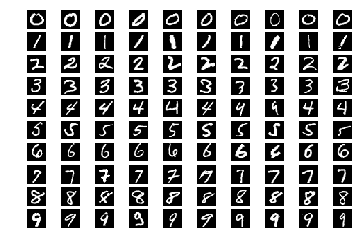

In [4]:
def P1(num_examples=10):
    # Here, I am using mini_train_data, mini_train_labels to build this grid
    data = mini_train_data
    labels = mini_train_labels
    
    plt.close('all')

    # Set up subplots for this 10x10 grid 
    f, axarr = plt.subplots(num_examples,num_examples)

    # for each digit (0->9), we will find 10 images and display them in 10 rows
    for i in range(num_examples):
        count = 0
        # Find this digit in mini_train_labels 10 times
        for j in range(len(labels)):
            # Get the 1st 10 elements of this digit
            if (count >= num_examples):
                break  # done with this digit, move on to the next digit
            # When the same digit is found, create the corresponding image and put it
            # in the current spot in the 10x10 grid
            if (labels[j] == i):
                # 1-D 784 list can be convert to 2-D 28x28 matrix
                digit = np.reshape(data[j],(28,28))
                axarr[i,count].axis('off')
                axarr[i,count].imshow(digit, cmap='gray', interpolation='nearest')
                count = count + 1

    plt.show()
    
P1(10)

In [5]:
data = mini_train_data
labels = mini_train_labels

def P2(k_values):
### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(data, labels)
        predicted_labels = model.predict(dev_data)
        correct = (predicted_labels == dev_labels)
        print('For k = %d, number of correct predictions: %3.2f' %(k, (sum(correct)/dev_labels.size)))
        if (k == 1):
            print(classification_report(dev_labels, predicted_labels))
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]

P2(k_values)

For k = 1, number of correct predictions: 0.89
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

For k = 3, number of correct predictions: 0.88
For k = 5, number of correct predictions: 0.87
For k = 7, number of correct predictions: 0.86
For k = 9, number of correct predictions: 0.86
